# PRE-PLACEMENT PROJECT - ESPORTS DATA ANALYSIS

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sb

## BUSINESS OBJECTIVES

In [5]:
# 1. Has the Total Earnings increased through the years?
# 2. Which Genre has the highest and Lowest Total Earnings?
# 3. Among the top 5 Genres, which one has the highest earnings in 2022?
# 4. GAME WITH HIGHEST OFFLINE TOTAL EARNINGS
# 5. GAME WITH HIGHEST ONLINE TOTAL EARNINGS
# 6. Does the number of players have an impact on the Total Earnings?
# 7. How has Covid-19 pandemic affected the number of games released each year?
# 8. Has the online earnings increased post covid?
# 9. In the past decade, which genre has contributed to the Total Earnings the most
# 10. Which genres have hosted the most tournaments in the past decade?
# 11. Among the top5 genre, which one has had increase in Total Earnings post covid?
# 12. In which year was the maximum number of games released?
# 13. Games with the highest earnings in the last decade
# 14. Total Earnings generated per player for the top 10 games
# 15. Total Offline Earnings generated per tournament for the top 10 games

## DATA COLLECTION

In [2]:
# Load the data
df_espo=pd.read_csv('GeneralEsportData.csv')
df_espo

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,510716.46,375857.63,0.735942,473,265
1,Age of Empires II,1999,Strategy,3253232.59,1139384.57,0.350232,1994,1613
2,Age of Empires III,2005,Strategy,115843.65,41800.00,0.360831,166,163
3,Age of Empires IV,2021,Strategy,994675.03,409117.93,0.411308,542,327
4,Age of Empires Online,2011,Strategy,9806.56,775.00,0.079029,44,50
...,...,...,...,...,...,...,...,...
645,Guitar Hero 5,2009,Music / Rhythm Game,10500.00,10500.00,1.000000,3,1
646,Guitar Hero III: Legends of Rock,2007,Music / Rhythm Game,19000.00,19000.00,1.000000,8,2
647,Guitar Hero: World Tour,2008,Music / Rhythm Game,0.00,0.00,NaN,0,0
648,Just Dance 2014,2013,Music / Rhythm Game,0.00,0.00,NaN,3,1


## DATA UNDERSTANDING

In [7]:
df_espo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              650 non-null    object 
 1   ReleaseDate       650 non-null    int64  
 2   Genre             650 non-null    object 
 3   TotalEarnings     650 non-null    float64
 4   OfflineEarnings   650 non-null    float64
 5   PercentOffline    583 non-null    float64
 6   TotalPlayers      650 non-null    int64  
 7   TotalTournaments  650 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 40.8+ KB


In [9]:
df_espo.head()

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,510716.46,375857.63,0.735942,473,265
1,Age of Empires II,1999,Strategy,3253232.59,1139384.57,0.350232,1994,1613
2,Age of Empires III,2005,Strategy,115843.65,41800.00,0.360831,166,163
3,Age of Empires IV,2021,Strategy,994675.03,409117.93,0.411308,542,327
4,Age of Empires Online,2011,Strategy,9806.56,775.00,0.079029,44,50


In [10]:
df_espo.tail()

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
645,Guitar Hero 5,2009,Music / Rhythm Game,10500.00,10500.00,1.00000,3,1
646,Guitar Hero III: Legends of Rock,2007,Music / Rhythm Game,19000.00,19000.00,1.00000,8,2
647,Guitar Hero: World Tour,2008,Music / Rhythm Game,0.00,0.00,NaN,0,0
648,Just Dance 2014,2013,Music / Rhythm Game,0.00,0.00,NaN,3,1
649,osu!,2007,Music / Rhythm Game,228205.84,26827.89,0.11756,854,205


## DATA CLEANING AND PRE PROCESSING

In [4]:
df_espo.isnull().sum()

Game                 0
ReleaseDate          0
Genre                0
TotalEarnings        0
OfflineEarnings      0
PercentOffline      67
TotalPlayers         0
TotalTournaments     0
dtype: int64

In [3]:
#Checking the datatypes of the columns
df_espo.dtypes

Game                 object
ReleaseDate           int64
Genre                object
TotalEarnings       float64
OfflineEarnings     float64
PercentOffline      float64
TotalPlayers          int64
TotalTournaments      int64
dtype: object

In [5]:
# Checking the TotalEarnings and OfflineEarnings for rows with null in PercentOffline column
null_check = pd.isnull(df_espo["PercentOffline"])
df_null= df_espo[null_check]
df_null

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments
14,Clash Royale x Chess,2022,Strategy,0.0,0.0,NaN,0,0
22,Endgods,2015,Strategy,0.0,0.0,NaN,0,0
26,Heroes of Might and Magic III,1999,Strategy,0.0,0.0,NaN,0,0
29,Iron Harvest,2020,Strategy,0.0,0.0,NaN,0,0
30,Legion TD 2,2021,Strategy,0.0,0.0,NaN,0,0
...,...,...,...,...,...,...,...,...
624,Penguin Paradise,2022,Battle Royale,0.0,0.0,NaN,0,0
630,Rules Of Survival,2017,Battle Royale,0.0,0.0,NaN,0,0
639,Knockout City,2021,Third-Person Shooter,0.0,0.0,NaN,0,0
647,Guitar Hero: World Tour,2008,Music / Rhythm Game,0.0,0.0,NaN,0,0


In [6]:
# Checking for any rows where TotalEarnings and OfflineEarnings are greater that 0 with null PercentOffline
df_error = df_null.loc[(df_espo['TotalEarnings']>0) | (df_espo['OfflineEarnings']>0)]
df_error

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments


In [7]:
# Since all the rows with PercentOffline = null have TotalEarnings and OfflineEarnings as zero, we replace null with 0
df_espo['PercentOffline']=df_espo['PercentOffline'].fillna(0)
df_espo.isnull().sum()

Game                0
ReleaseDate         0
Genre               0
TotalEarnings       0
OfflineEarnings     0
PercentOffline      0
TotalPlayers        0
TotalTournaments    0
dtype: int64

In [8]:
# Calculating and adding OnlineEarnings column
onl_earn=df_espo["TotalEarnings"].sub(df_espo["OfflineEarnings"],fill_value=0)
onl_earn

0       134858.83
1      2113848.02
2        74043.65
3       585557.10
4         9031.56
          ...    
645          0.00
646          0.00
647          0.00
648          0.00
649     201377.95
Length: 650, dtype: float64

In [9]:
df_espo['OnlineEarnings'] = onl_earn #Updating the original dataframe with new column 
df_espo

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments,OnlineEarnings
0,Age of Empires,1997,Strategy,510716.46,375857.63,0.735942,473,265,134858.83
1,Age of Empires II,1999,Strategy,3253232.59,1139384.57,0.350232,1994,1613,2113848.02
2,Age of Empires III,2005,Strategy,115843.65,41800.00,0.360831,166,163,74043.65
3,Age of Empires IV,2021,Strategy,994675.03,409117.93,0.411308,542,327,585557.10
4,Age of Empires Online,2011,Strategy,9806.56,775.00,0.079029,44,50,9031.56
...,...,...,...,...,...,...,...,...,...
645,Guitar Hero 5,2009,Music / Rhythm Game,10500.00,10500.00,1.000000,3,1,0.00
646,Guitar Hero III: Legends of Rock,2007,Music / Rhythm Game,19000.00,19000.00,1.000000,8,2,0.00
647,Guitar Hero: World Tour,2008,Music / Rhythm Game,0.00,0.00,0.000000,0,0,0.00
648,Just Dance 2014,2013,Music / Rhythm Game,0.00,0.00,0.000000,3,1,0.00


# DATA ANALYSIS

In [10]:
# Separating Categorical and numerical data
df_espo.dtypes

Game                 object
ReleaseDate           int64
Genre                object
TotalEarnings       float64
OfflineEarnings     float64
PercentOffline      float64
TotalPlayers          int64
TotalTournaments      int64
OnlineEarnings      float64
dtype: object

In [11]:
categorical = df_espo.select_dtypes(include=object).columns
pd.DataFrame(categorical,columns=['Categorical'])

,Categorical
0,Game
1,Genre


In [12]:
numerical = df_espo.select_dtypes(exclude=object).columns
pd.DataFrame(numerical,columns=['Numerical'])

,Numerical
0,ReleaseDate
1,TotalEarnings
2,OfflineEarnings
3,PercentOffline
4,TotalPlayers
5,TotalTournaments
6,OnlineEarnings


In [189]:
# ReleaseDate is a CATEGORICAL DATA. 

In [190]:
# Objective 1: Has the Total Earnings increased through the years?
year_earn = df_espo.groupby('ReleaseDate')['TotalEarnings'].sum()
year_earn

ReleaseDate
1981    0.000000e+00
1985    3.200000e+03
1989    6.582799e+04
1993    4.638560e+03
1994    3.660132e+04
1995    1.350119e+04
1996    1.236464e+05
1997    6.732148e+05
1998    7.557193e+06
1999    4.832279e+06
2000    1.425709e+07
2001    4.566884e+06
2002    8.537996e+06
2003    1.267927e+06
2004    1.537296e+07
2005    2.222965e+06
2006    1.061785e+06
2007    2.953283e+07
2008    6.436536e+06
2009    1.052916e+08
2010    5.112869e+07
2011    3.829103e+06
2012    1.728486e+08
2013    3.442914e+08
2014    5.130027e+07
2015    1.976607e+08
2016    7.619893e+07
2017    3.338493e+08
2018    4.152141e+07
2019    4.994093e+07
2020    5.357057e+07
2021    3.477141e+07
2022    2.875447e+07
2023    1.518758e+06
Name: TotalEarnings, dtype: float64

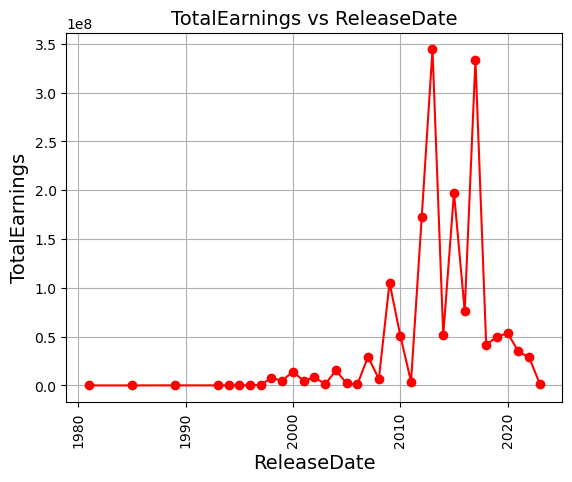

In [191]:
plt.plot(year_earn.index, year_earn.values, color='red', marker='o')
plt.title('TotalEarnings vs ReleaseDate', fontsize=14)
plt.xlabel('ReleaseDate', fontsize=14)
plt.ylabel('TotalEarnings', fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [55]:
# TOTAL EARNINGS HAS SPIKED IN YEARS 2013 AND 2017. 

In [56]:
# Objective 2: Which Genre has the highest and Lowest Total Earnings?
genre_earn = df_espo.groupby('Genre')['TotalEarnings'].sum()
genre_earn

Genre
Battle Royale                      3.399778e+08
Collectible Card Game              4.927569e+07
Fighting Game                      3.132520e+07
First-Person Shooter               4.135596e+08
Multiplayer Online Battle Arena    5.765639e+08
Music / Rhythm Game                2.750479e+05
Puzzle Game                        9.788889e+04
Racing                             1.710928e+07
Role-Playing Game                  1.274778e+07
Sports                             8.444583e+07
Strategy                           1.115595e+08
Third-Person Shooter               6.105826e+06
Name: TotalEarnings, dtype: float64

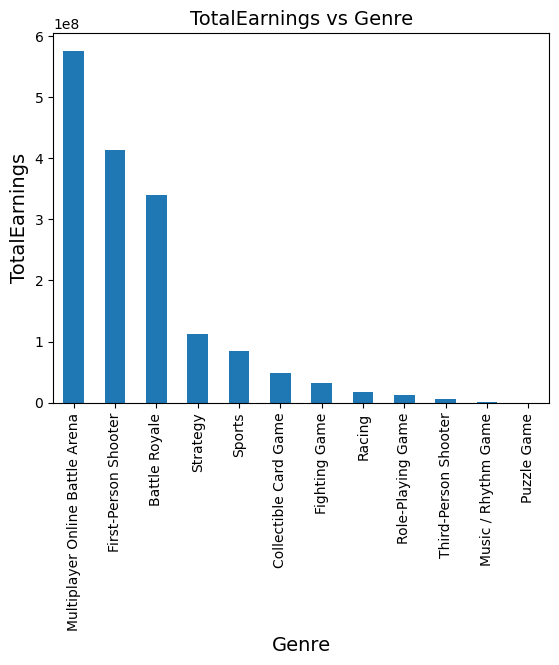

In [57]:
genre_earn.sort_values(ascending=False).plot.bar()
plt.title('TotalEarnings vs Genre', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('TotalEarnings', fontsize=14)
plt.show()

In [58]:
# MULTIPLAYER ONLINE BATTLE ARENA AND PUZZLE GAME HAVE HAD THE HIGHEST AND LOWEST TOTAL EARNINGS RESPECTIVELY

In [87]:
# Objective 3: Among the top 5 Genres, which one has the highest earnings in 2022?
top5 = genre_earn.sort_values(ascending=False).head(5)
top5_genre = list(top5.index)
top5_genre

['Multiplayer Online Battle Arena',
 'First-Person Shooter',
 'Battle Royale',
 'Strategy',
 'Sports']

In [192]:
high22=df_espo[(df_espo['Genre'].isin(top5_genre)) & (df_espo['ReleaseDate']==2022)]
high22=high22[["Genre", "TotalEarnings"]].groupby('Genre')['TotalEarnings'].sum()
high22

Genre
Battle Royale             144526.00
First-Person Shooter    15152924.90
Sports                  10943638.13
Strategy                   24500.00
Name: TotalEarnings, dtype: float64

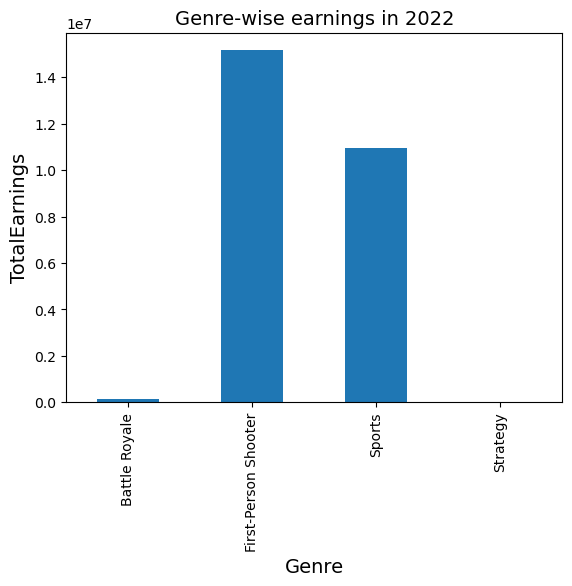

In [90]:
high22.plot.bar()
plt.title('Genre-wise earnings in 2022', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('TotalEarnings', fontsize=14)
plt.show()

In [121]:
# FIRST PERSON SHOOTER GENRE HAS THE HIGHEST EARNINGS IN 2022

In [94]:
# Objective 4: Which game has the highest offline total earnings?
grp_game_off = df_espo.groupby('Game')['OfflineEarnings'].sum()
top10_game_off = grp_game_off.sort_values(ascending=False).head(10)
top10_game_off

Game
Dota 2                                  2.982906e+08
Counter-Strike: Global Offensive        1.050531e+08
League of Legends                       9.081567e+07
Arena of Valor                          7.383164e+07
PLAYERUNKNOWN'S BATTLEGROUNDS Mobile    4.950137e+07
Fortnite                                4.872826e+07
PLAYERUNKNOWN’S BATTLEGROUNDS           4.298588e+07
StarCraft II                            3.181118e+07
Rainbow Six Siege                       3.026696e+07
Overwatch                               1.884003e+07
Name: OfflineEarnings, dtype: float64

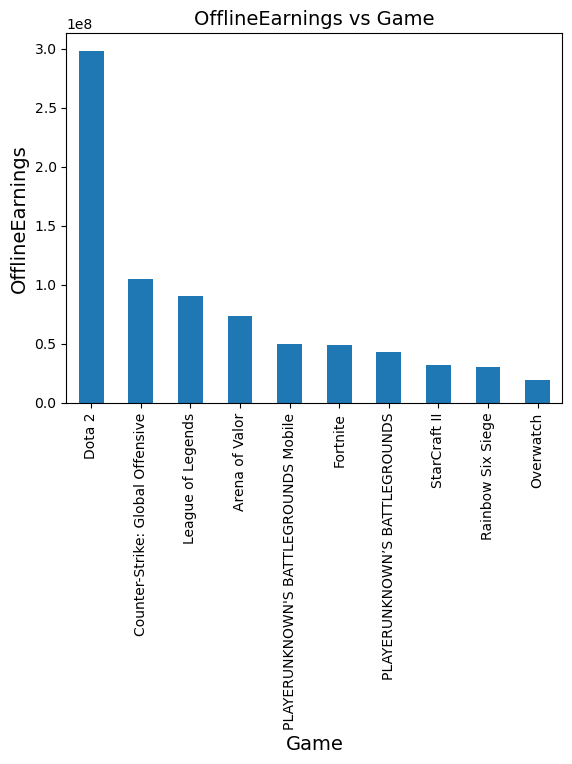

In [95]:
top10_game_off.plot.bar()
plt.title('OfflineEarnings vs Game', fontsize=14)
plt.xlabel('Game', fontsize=14)
plt.ylabel('OfflineEarnings', fontsize=14)
plt.show()

In [96]:
# DOTA 2 IS THE GAME WITH HIGHEST OFFLINE EARNINGS

In [13]:
# Objective 5: Which game has the highest online earnings?
game_onl = df_espo.groupby('Game')['OnlineEarnings'].sum() #Fetching Online earnings grouped by games and storing in variable 'game_onl'
game_onl

Game
ARMS                           8886.97
Acceleration of SUGURI 2        200.00
After-H                           0.00
Age of Empires               134858.83
Age of Empires II           2113848.02
                               ...    
eFootball                    467000.00
iRacing.com                 2592676.93
osu!                         201377.95
rFactor                       15083.56
rFactor 2                    767566.18
Name: OnlineEarnings, Length: 650, dtype: float64

In [15]:
top10_game_onl = game_onl.sort_values(ascending=False).head(10) #Sorting values in 'game_onl' in descending order and storing in 'top10_game_onl'
top10_game_onl

Game
Fortnite                                1.212075e+08
Counter-Strike: Global Offensive        5.656274e+07
Dota 2                                  3.881740e+07
PLAYERUNKNOWN'S BATTLEGROUNDS Mobile    2.446972e+07
Rocket League                           2.021819e+07
Overwatch                               1.577669e+07
League of Legends                       1.419538e+07
PLAYERUNKNOWN’S BATTLEGROUNDS           1.398232e+07
Apex Legends                            1.177411e+07
Hearthstone                             1.125638e+07
Name: OnlineEarnings, dtype: float64

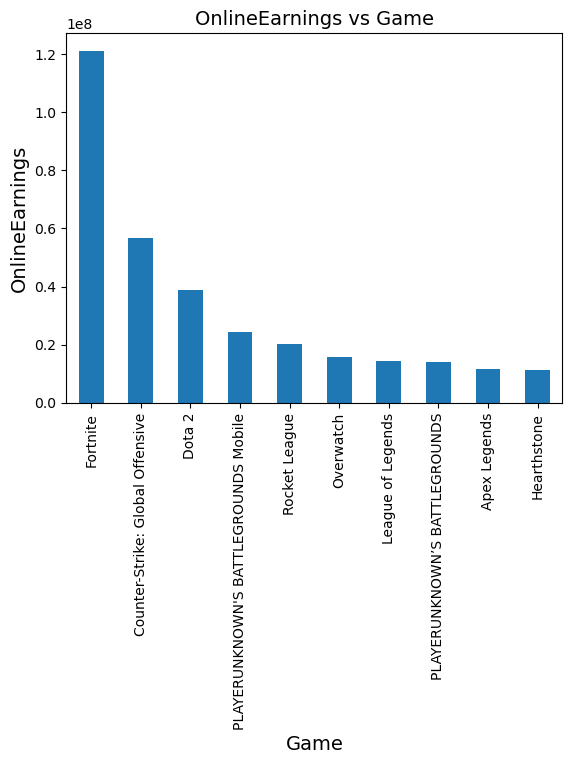

In [141]:
top10_game_onl.plot.bar()
plt.title('OnlineEarnings vs Game', fontsize=14)
plt.xlabel('Game', fontsize=14)
plt.ylabel('OnlineEarnings', fontsize=14)
plt.show()

In [142]:
# FORTNITE IS THE GAME WITH HIGHEST ONLINE EARNINGS

In [143]:
# Objective 6: Does the number of players have an impact on the Total Earnings?
df_num = df_espo[numerical]    #Storing numercial columns alone in a dataframe.
df_num

,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments,OnlineEarnings
0,510716.46,375857.63,0.735942,473,265,134858.83
1,3253232.59,1139384.57,0.350232,1994,1613,2113848.02
2,115843.65,41800.00,0.360831,166,163,74043.65
3,994675.03,409117.93,0.411308,542,327,585557.10
4,9806.56,775.00,0.079029,44,50,9031.56
...,...,...,...,...,...,...
645,10500.00,10500.00,1.000000,3,1,0.00
646,19000.00,19000.00,1.000000,8,2,0.00
647,0.00,0.00,0.000000,0,0,0.00
648,0.00,0.00,0.000000,3,1,0.00


In [144]:
#Correlation
corr_df=df_num.corr()
corr_df

,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments,OnlineEarnings
TotalEarnings,1.000000,0.961024,0.036417,0.718951,0.529548,0.752285
OfflineEarnings,0.961024,1.000000,0.056504,0.611991,0.466640,0.540819
PercentOffline,0.036417,0.056504,1.000000,0.037545,0.040998,-0.023856
TotalPlayers,0.718951,0.611991,0.037545,1.000000,0.759587,0.728975
TotalTournaments,0.529548,0.466640,0.040998,0.759587,1.000000,0.499100
OnlineEarnings,0.752285,0.540819,-0.023856,0.728975,0.499100,1.000000


<Axes: >

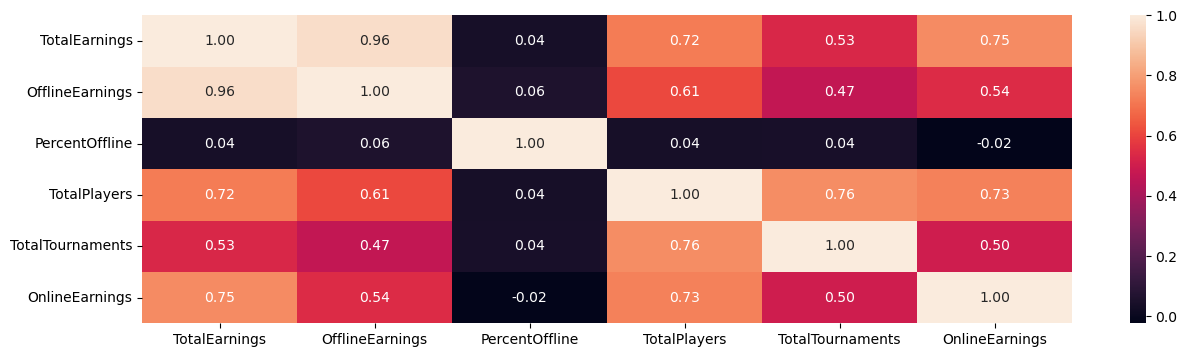

In [145]:
plt.figure(figsize=(15,4))
sb.heatmap(corr_df,annot=True,fmt='.2f')

In [146]:
# TOTALPLAYERS HAS A POSITIVE CORRELATION OF 72% WITH TOTALEARNINGS
# HENCE THE INCREASE IN THE NUMBER OF PLAYERS CONTRIBUTES TO THE REVENUE GENERATED

In [22]:
# Objective 7: How has Covid-19 pandemic affected the number of games released each year?
post_covid = df_espo[df_espo['ReleaseDate'] >2018] #fetching records where release date is after 2018.
post_covid

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments,OnlineEarnings
3,Age of Empires IV,2021,Strategy,994675.03,409117.93,0.411308,542,327,585557.10
7,Auto Chess,2019,Strategy,1163720.28,1038222.28,0.892158,133,52,125498.00
11,chessarena.com,2021,Strategy,263363.64,54000.00,0.205040,134,22,209363.64
14,Clash Royale x Chess,2022,Strategy,0.00,0.00,0.000000,0,0,0.00
20,Dead by Daylight Mobile,2020,Strategy,10000.00,0.00,0.000000,0,1,10000.00
...,...,...,...,...,...,...,...,...,...
639,Knockout City,2021,Third-Person Shooter,0.00,0.00,0.000000,0,0,0.00
641,Rogue Company,2020,Third-Person Shooter,50000.00,0.00,0.000000,48,2,50000.00
642,The Division 2,2019,Third-Person Shooter,27250.00,0.00,0.000000,40,2,27250.00
643,Audio Trip,2020,Music / Rhythm Game,650.00,0.00,0.000000,4,2,650.00


In [148]:
cov_game = post_covid.groupby('ReleaseDate')['Game'].count()   #Count of games grouped by release date where release date is after 2018.
cov_game

ReleaseDate
2019    49
2020    44
2021    37
2022    28
2023     6
Name: Game, dtype: int64

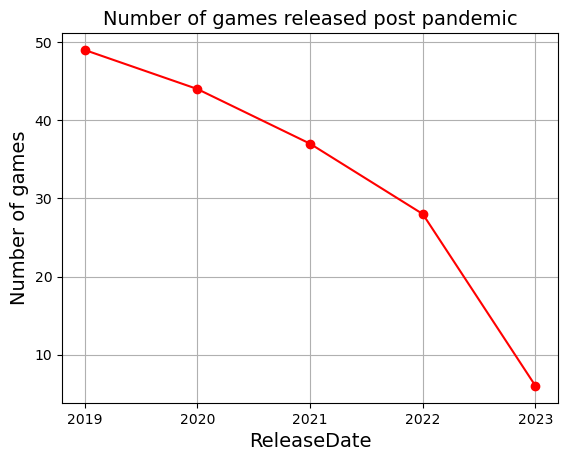

In [194]:
plt.plot(cov_game.index, cov_game.values, color='red', marker='o')
plt.title('Number of games released post pandemic', fontsize=14)
plt.xlabel('ReleaseDate', fontsize=14)
plt.ylabel('Number of games', fontsize=14)
plt.grid(True)
plt.show()

In [151]:
# THE NUMBER OF GAMES RELEASED EACH YEAR HAS DECLINED POST COVID

In [23]:
# Objective 8: Has the online earnings increased post covid?
cov_onl = post_covid.groupby('ReleaseDate')['OnlineEarnings'].sum()  #Sum of Online earnings grouped by release date where release date is after 2018.
cov_game
cov_onl

ReleaseDate
2019    29127982.50
2020    34153865.72
2021     9128544.03
2022     6463863.39
2023      122783.86
Name: OnlineEarnings, dtype: float64

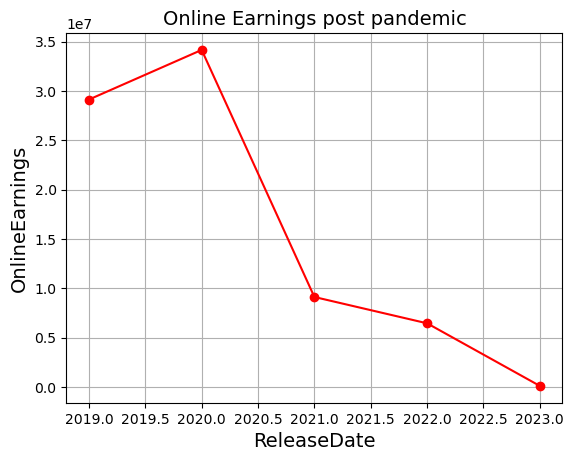

In [196]:
plt.plot(cov_onl.index, cov_onl.values, color='red', marker='o')
plt.title('Online Earnings post pandemic', fontsize=14)
plt.xlabel('ReleaseDate', fontsize=14)
plt.ylabel('OnlineEarnings', fontsize=14)
plt.grid(True)
plt.show()

In [156]:
#  THERE HAS BEEN A STEEP DROP IN ONLINE EARNINGS FROM 2020 TO 2021 AND THEN A GRADUAL DECREASE TO 2023.

In [197]:
# Objective 9: In the past decade, which genre has contributed to the Total Earnings the most
decade = df_espo[df_espo["ReleaseDate"]>2013]  #Fetching the records from dataframe for the last 10 years.
decade

,Game,ReleaseDate,Genre,TotalEarnings,OfflineEarnings,PercentOffline,TotalPlayers,TotalTournaments,OnlineEarnings
3,Age of Empires IV,2021,Strategy,994675.03,409117.93,0.411308,542,327,585557.10
6,Among Us,2018,Strategy,86000.00,0.00,0.000000,14,8,86000.00
7,Auto Chess,2019,Strategy,1163720.28,1038222.28,0.892158,133,52,125498.00
8,Brawl Stars,2018,Strategy,7145011.80,3098208.14,0.433618,693,196,4046803.66
10,chess24,2014,Strategy,4318475.43,0.00,0.000000,90,29,4318475.43
...,...,...,...,...,...,...,...,...,...
640,Mobile Suit Gundam: Extreme Vs Maxi Boost ON,2016,Third-Person Shooter,420.00,320.00,0.761905,12,2,100.00
641,Rogue Company,2020,Third-Person Shooter,50000.00,0.00,0.000000,48,2,50000.00
642,The Division 2,2019,Third-Person Shooter,27250.00,0.00,0.000000,40,2,27250.00
643,Audio Trip,2020,Music / Rhythm Game,650.00,0.00,0.000000,4,2,650.00


In [163]:
dec_gen = decade.groupby('Genre')['TotalEarnings'].sum()  #Fetching sum of Total Earnings grouped by Genre for the last 10 years
dec_gen

Genre
Battle Royale                      3.399778e+08
Collectible Card Game              4.745769e+07
Fighting Game                      2.423922e+07
First-Person Shooter               1.971146e+08
Multiplayer Online Battle Arena    1.284444e+08
Music / Rhythm Game                1.734206e+04
Puzzle Game                        1.484495e+04
Racing                             8.091220e+06
Role-Playing Game                  3.006731e+06
Sports                             7.962405e+07
Strategy                           3.538754e+07
Third-Person Shooter               5.711375e+06
Name: TotalEarnings, dtype: float64

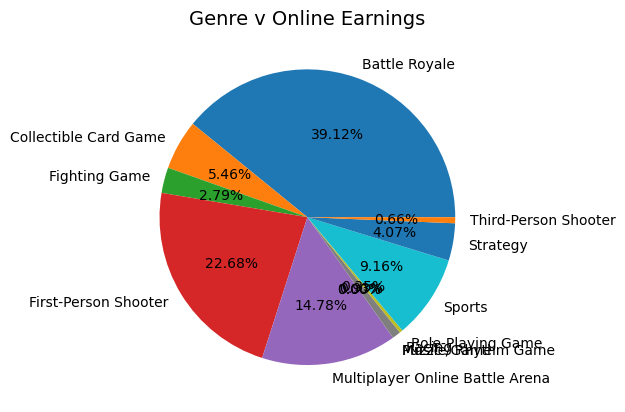

In [164]:
plt.title('Genre v Online Earnings', fontsize=14)
plt.pie(dec_gen.values,labels = dec_gen.index, autopct= "%0.2f%%")
plt.show()

In [169]:
# BATTLE ROYALE HAS CONTRIBUTED THE MOST TO THE TOTAL EARNINGS IN THE PAST DECADE

In [166]:
# Objective 10: Which genres have hosted the most tournaments in the past decade?
dec_tour = decade.groupby('Genre')['TotalTournaments'].sum().sort_values(ascending=False) #fetching sum of tournaments grouped by genre for the last decade
dec_tour                                                                                  #sorting them in descending order.

Genre
Fighting Game                      5978
First-Person Shooter               5259
Sports                             4725
Battle Royale                      3453
Strategy                           1954
Collectible Card Game              1859
Multiplayer Online Battle Arena    1128
Racing                             1062
Third-Person Shooter                273
Puzzle Game                          45
Role-Playing Game                    16
Music / Rhythm Game                  13
Name: TotalTournaments, dtype: int64

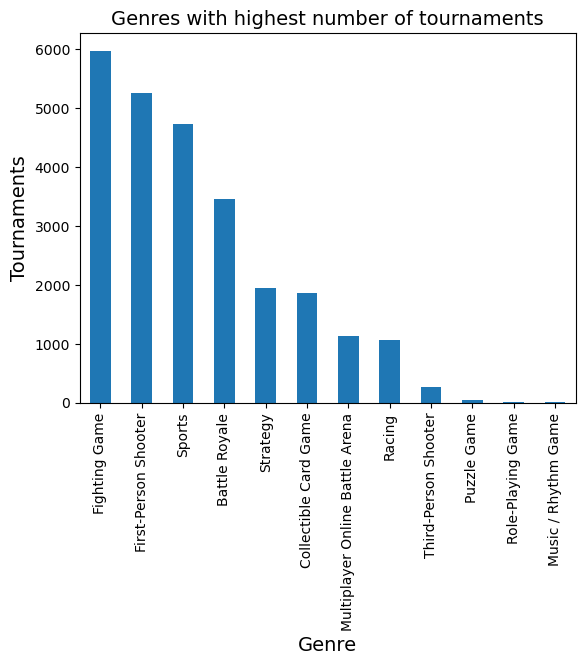

In [167]:
dec_tour.plot.bar()
plt.title('Genres with highest number of tournaments', fontsize=14)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Tournaments', fontsize=14)
plt.show()

In [168]:
# FIGHTING GAMES HAVE HELD THE MOST NUMBER OF TOURNAMENTS IN THE PAST DECADE

In [198]:
# Objective 11: Among the top5 genre, which one has had increase in Total Earnings post covid?
covid_inc = post_covid[post_covid['Genre'].isin(top5_genre)][['Genre','ReleaseDate','TotalEarnings']].set_index('Genre')


covid_inc

,ReleaseDate,TotalEarnings
Genre,,
Strategy,2021,994675.03
Strategy,2019,1163720.28
Strategy,2021,263363.64
Strategy,2022,0.00
Strategy,2020,10000.00
...,...,...
Battle Royale,2023,0.00
Battle Royale,2022,0.00
Battle Royale,2020,100000.00


In [171]:
covid_inc.index.unique()

Index(['Strategy', 'First-Person Shooter', 'Multiplayer Online Battle Arena',
       'Sports', 'Battle Royale'],
      dtype='object', name='Genre')

In [181]:
strat = covid_inc.loc['Strategy']
fps = covid_inc.loc['First-Person Shooter']
moba = covid_inc.loc['Multiplayer Online Battle Arena']
sports = covid_inc.loc['Sports']
battle = covid_inc.loc['Battle Royale']

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Strategy'),
  Text(1, 0, 'First-Person Shooter'),
  Text(2, 0, 'Multiplayer Online Battle Arena'),
  Text(3, 0, 'Sports'),
  Text(4, 0, 'Battle Royale')])

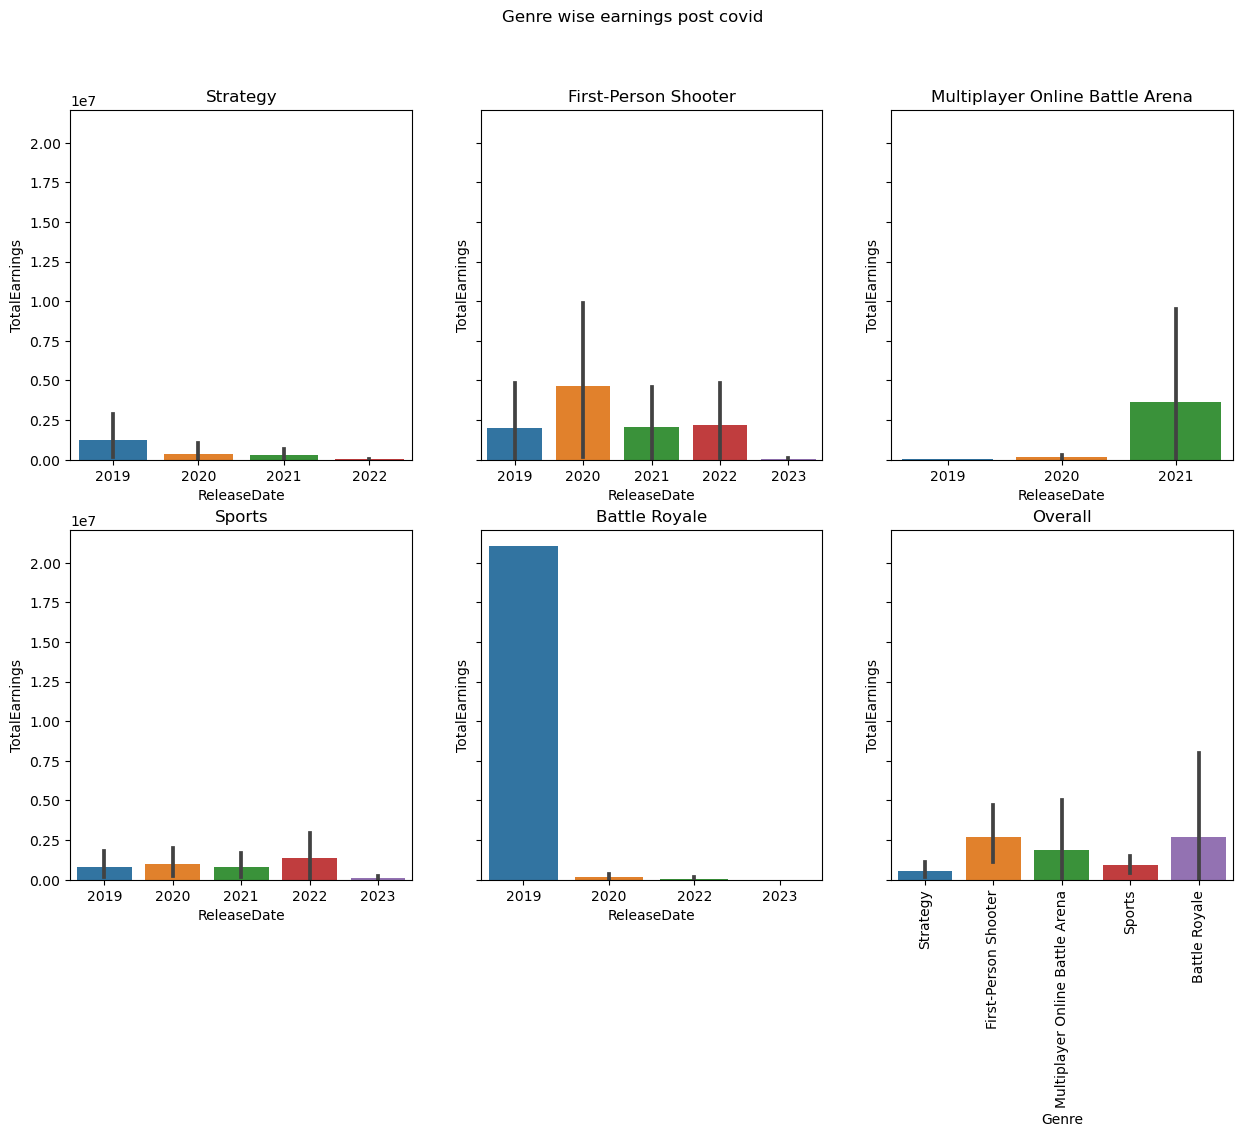

In [199]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True)
fig.suptitle('Genre wise earnings post covid')

# Strategy
sb.barplot(ax=axes[0,0], x=strat['ReleaseDate'], y=strat['TotalEarnings'])
axes[0,0].set_title('Strategy')

# First-Person Shooter
sb.barplot(ax=axes[0,1], x=fps['ReleaseDate'], y=fps['TotalEarnings'])
axes[0,1].set_title('First-Person Shooter')

# Multiplayer Online Battle Arena
sb.barplot(ax=axes[0,2], x=moba['ReleaseDate'], y=moba['TotalEarnings'])
axes[0,2].set_title('Multiplayer Online Battle Arena')

# Sports
sb.barplot(ax=axes[1,0], x=sports['ReleaseDate'], y=sports['TotalEarnings'])
axes[1,0].set_title('Sports')

# Battle Royale
sb.barplot(ax=axes[1,1], x=battle['ReleaseDate'], y=battle['TotalEarnings'])
axes[1,1].set_title('Battle Royale')

# Overall
sb.barplot(ax=axes[1,2], x=covid_inc.index, y=covid_inc['TotalEarnings'])
axes[1,2].set_title('Overall')
plt.xticks(rotation=90)

In [176]:
# Multiplayer Online Battle Arena has an increase in Total Earnings in 2021
# First-Person Shooter has a slight increase in 2022 after its decrease in 2021
# Battle Royale has a drastic decrease after 2019
# Strategy has gradually decreasing Total Earnings
# Sports has a slight increase in 2022 but huge decrease in 2023
# Among the genres, First-Person Shooter is consistently generating revenue throughout the pandemic

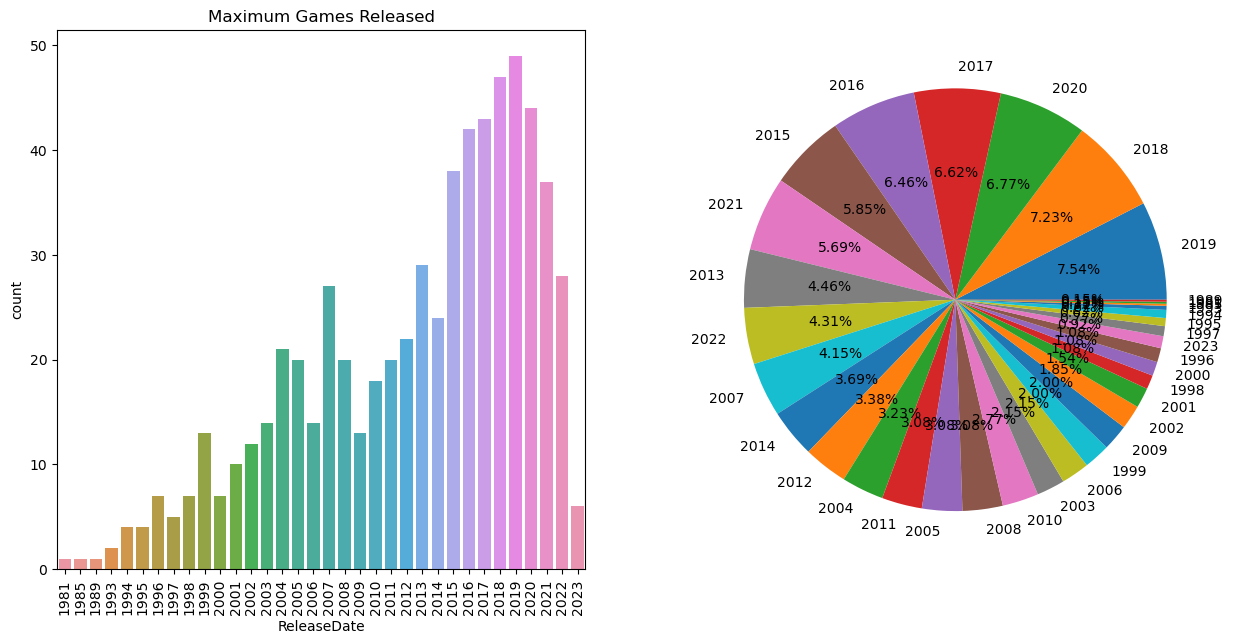

In [200]:
# Objective 12: In which year was the maximum number of games released?
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Maximum Games Released")                  
percentage = df_espo["ReleaseDate"].value_counts()         
labels = list(df_espo["ReleaseDate"].value_counts().index) 

plot = sb.countplot(x = df_espo["ReleaseDate"], ax = ax[0])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  

plt.show()

In [201]:
# THE MAXIMUM NUMBER OF GAMES WERE RELEASED IN 2019

In [202]:
# Objective 13: Games with the highest earnings in the last decade
top10games = decade.sort_values(by='TotalEarnings',ascending=False).head(10)  #
top10_earn = top10games[['Game','TotalEarnings','OfflineEarnings']].set_index('Game')
top10_earn

,TotalEarnings,OfflineEarnings
Game,,
Fortnite,1.699358e+08,48728256.19
Arena of Valor,7.792090e+07,73831635.30
PLAYERUNKNOWN'S BATTLEGROUNDS Mobile,7.397109e+07,49501367.13
PLAYERUNKNOWN’S BATTLEGROUNDS,5.696821e+07,42985882.95
Rainbow Six Siege,3.949302e+07,30266962.32
Rocket League,3.517705e+07,14958866.70
Overwatch,3.461673e+07,18840032.08
Hearthstone,2.953155e+07,18275169.29
VALORANT,2.384867e+07,12612230.78


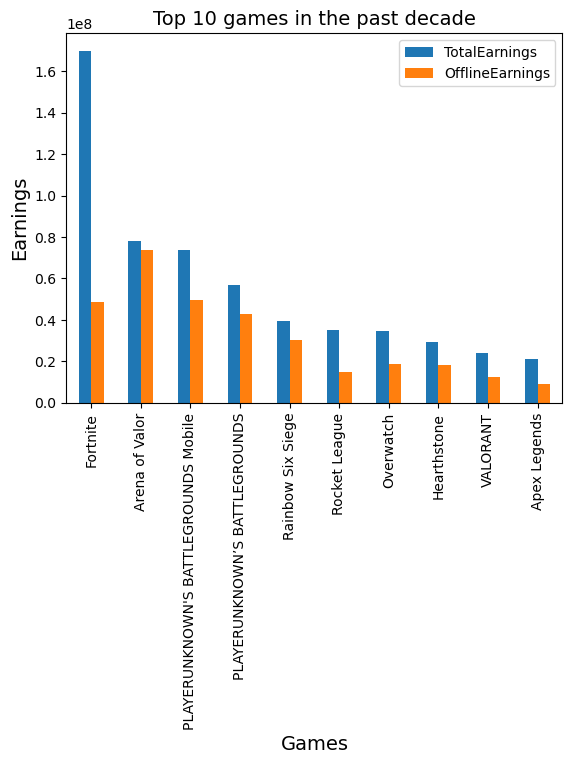

In [203]:
top10_earn.plot.bar()
plt.title('Top 10 games in the past decade', fontsize=14)
plt.xlabel('Games', fontsize=14)
plt.ylabel('Earnings', fontsize=14)
plt.show()

In [207]:
# FORTNITE HAS THE HIGHEST EARNINGS IN THE PAST DECADE

In [208]:
# Objective 14: Total Earnings generated per player for the top 10 games
player_earn = top10games[['Game','TotalEarnings','TotalPlayers']].set_index('Game')
player_earn['EarningPerPlayer'] = (top10games['TotalEarnings'].values)/(top10games['TotalPlayers'].values)
player_earn

,TotalEarnings,TotalPlayers,EarningPerPlayer
Game,,,
Fortnite,1.699358e+08,7819,21733.699449
Arena of Valor,7.792090e+07,1986,39235.096203
PLAYERUNKNOWN'S BATTLEGROUNDS Mobile,7.397109e+07,3841,19258.289750
PLAYERUNKNOWN’S BATTLEGROUNDS,5.696821e+07,3745,15211.803952
Rainbow Six Siege,3.949302e+07,2933,13465.061190
Rocket League,3.517705e+07,3945,8916.870281
Overwatch,3.461673e+07,4047,8553.675656
Hearthstone,2.953155e+07,3071,9616.263699
VALORANT,2.384867e+07,6491,3674.112804


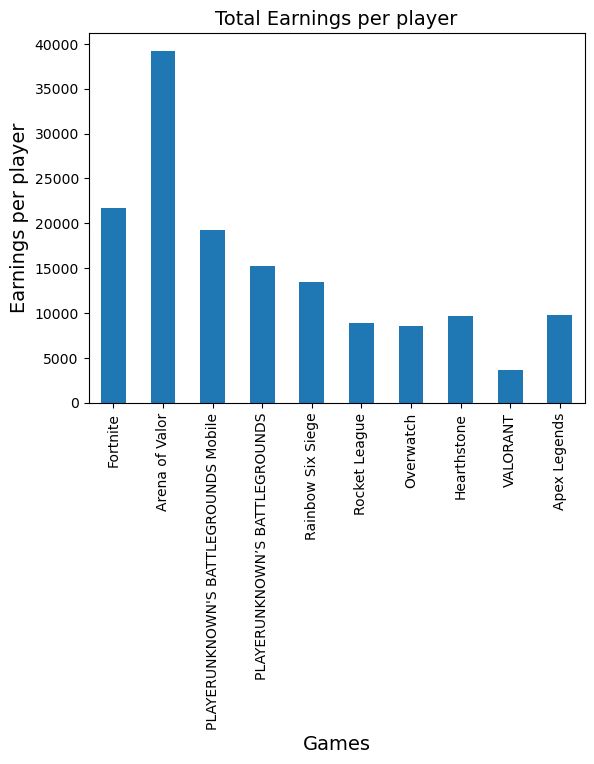

In [209]:
player_earn['EarningPerPlayer'].plot.bar()
plt.title('Total Earnings per player', fontsize=14)
plt.xlabel('Games', fontsize=14)
plt.ylabel('Earnings per player', fontsize=14)
plt.show()

In [210]:
# AMONG THE TOP 10 GAMES, ARENA OF VALOR HAS THE HIGHEST EARNINGS PER PLAYER

In [211]:
# Objective 15: Total Offline Earnings generated per tournament for the top 10 games
tour_earn = top10games[['Game','OfflineEarnings','TotalTournaments']].set_index('Game')
tour_earn['EarningPerTournament'] = (top10games['OfflineEarnings'].values)/(top10games['TotalTournaments'].values)
tour_earn

,OfflineEarnings,TotalTournaments,EarningPerTournament
Game,,,
Fortnite,48728256.19,1735,28085.450254
Arena of Valor,73831635.30,156,473279.713462
PLAYERUNKNOWN'S BATTLEGROUNDS Mobile,49501367.13,284,174300.588486
PLAYERUNKNOWN’S BATTLEGROUNDS,42985882.95,593,72488.841400
Rainbow Six Siege,30266962.32,543,55740.262099
Rocket League,14958866.70,3674,4071.547823
Overwatch,18840032.08,835,22562.912671
Hearthstone,18275169.29,1124,16259.047411
VALORANT,12612230.78,1134,11121.896631


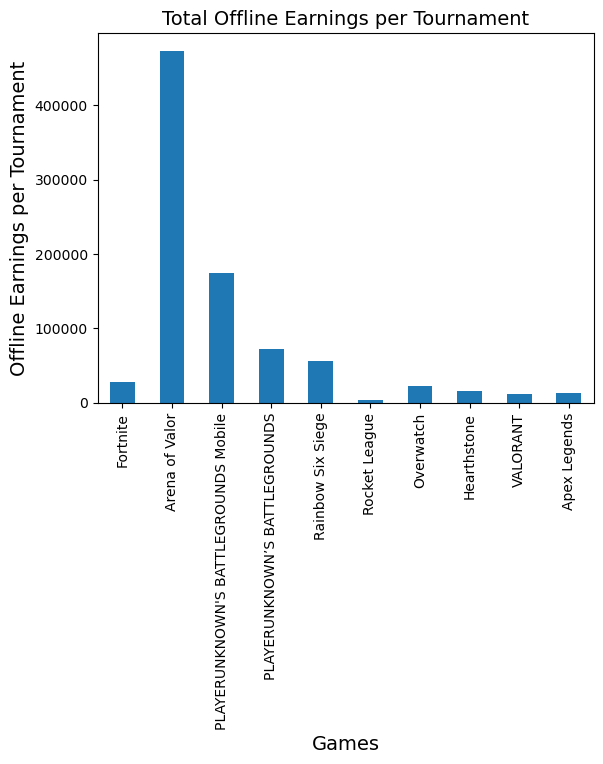

In [212]:
tour_earn['EarningPerTournament'].plot.bar()
plt.title('Total Offline Earnings per Tournament', fontsize=14)
plt.xlabel('Games', fontsize=14)
plt.ylabel('Offline Earnings per Tournament', fontsize=14)
plt.show()

In [213]:
# AMONG THE TOP 10 GAMES, ARENA OF VALOR GENERATES THE HIGHEST OFFLINE EARNINGS PER TOURNAMENT